##**Project 4: Customer Segmentation Using Mall Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
missing_values = data.isnull().sum()
missing_values


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


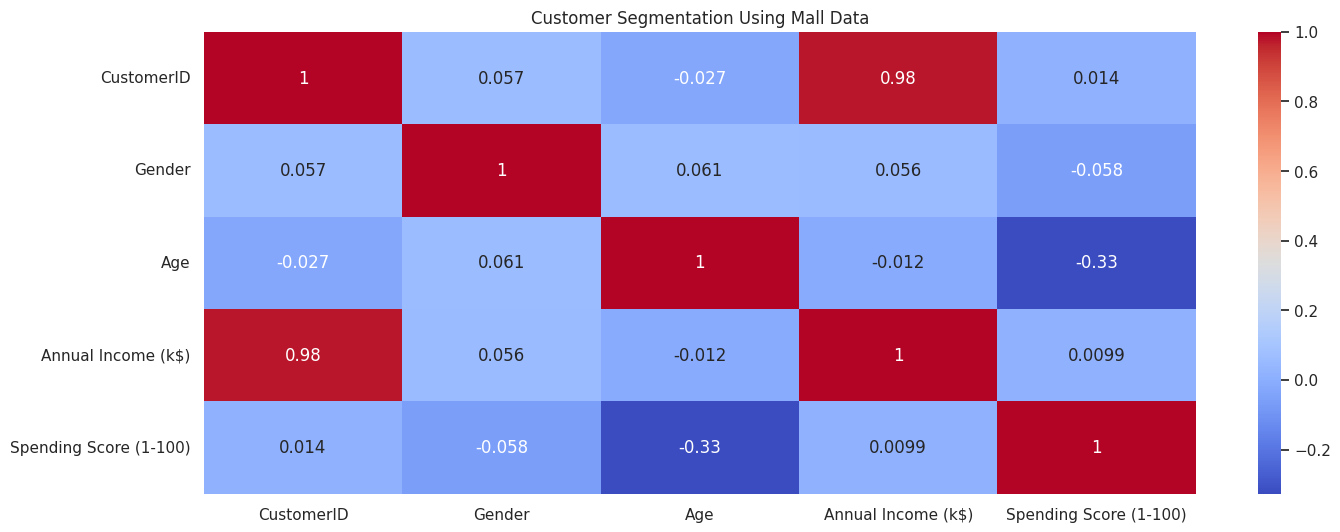

In [ ]:

sns.set()
plt.figure(figsize=(16, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Customer Segmentation Using Mall Data')
plt.show()


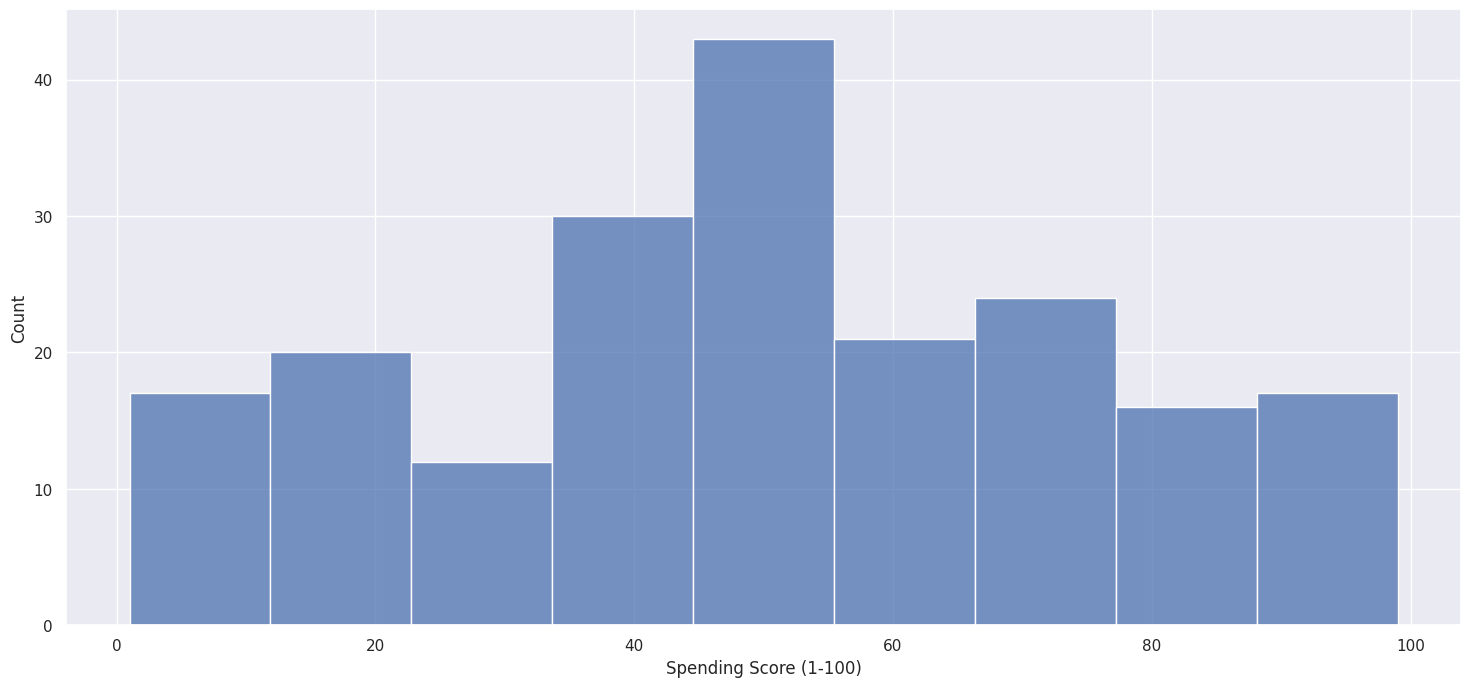

In [ ]:
sns.set()
plt.figure(figsize=(18, 8))
sns.histplot(data['Spending Score (1-100)'])
plt.show()

In [ ]:
scaler = StandardScaler()
data_scaled=scaler.fit_transform(data)
print(data_scaled)

[[-1.7234121   1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [-1.70609137  1.12815215 -1.28103541 -1.73899919  1.19570407]
 [-1.68877065 -0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [-1.67144992 -0.88640526 -1.13750203 -1.70082976  1.04041783]
 [-1.6541292  -0.88640526 -0.56336851 -1.66266033 -0.39597992]
 [-1.63680847 -0.88640526 -1.20926872 -1.66266033  1.00159627]
 [-1.61948775 -0.88640526 -0.27630176 -1.62449091 -1.71591298]
 [-1.60216702 -0.88640526 -1.13750203 -1.62449091  1.70038436]
 [-1.5848463   1.12815215  1.80493225 -1.58632148 -1.83237767]
 [-1.56752558 -0.88640526 -0.6351352  -1.58632148  0.84631002]
 [-1.55020485  1.12815215  2.02023231 -1.58632148 -1.4053405 ]
 [-1.53288413 -0.88640526 -0.27630176 -1.58632148  1.89449216]
 [-1.5155634  -0.88640526  1.37433211 -1.54815205 -1.36651894]
 [-1.49824268 -0.88640526 -1.06573534 -1.54815205  1.04041783]
 [-1.48092195  1.12815215 -0.13276838 -1.54815205 -1.44416206]
 [-1.46360123  1.12815215 -1.20926872 -1.54815205  1.11

In [ ]:
y = data['Spending Score (1-100)']

In [ ]:
rf = RandomForestClassifier()
rf.fit(data_scaled, y)

RandomForestClassifier()

Question3. Which features (age, income, spending score) influence segmentation the most?

In [ ]:
most_inflential_features = rf.feature_importances_
print(most_inflential_features)

[0.21378329 0.04221274 0.18673216 0.16303512 0.39423668]


In [ ]:
data.dropna(inplace=True)

In [ ]:
X = data[['CustomerID',	'Gender',	'Age',	'Annual Income (k$)',	'Spending Score (1-100)']]

In [ ]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

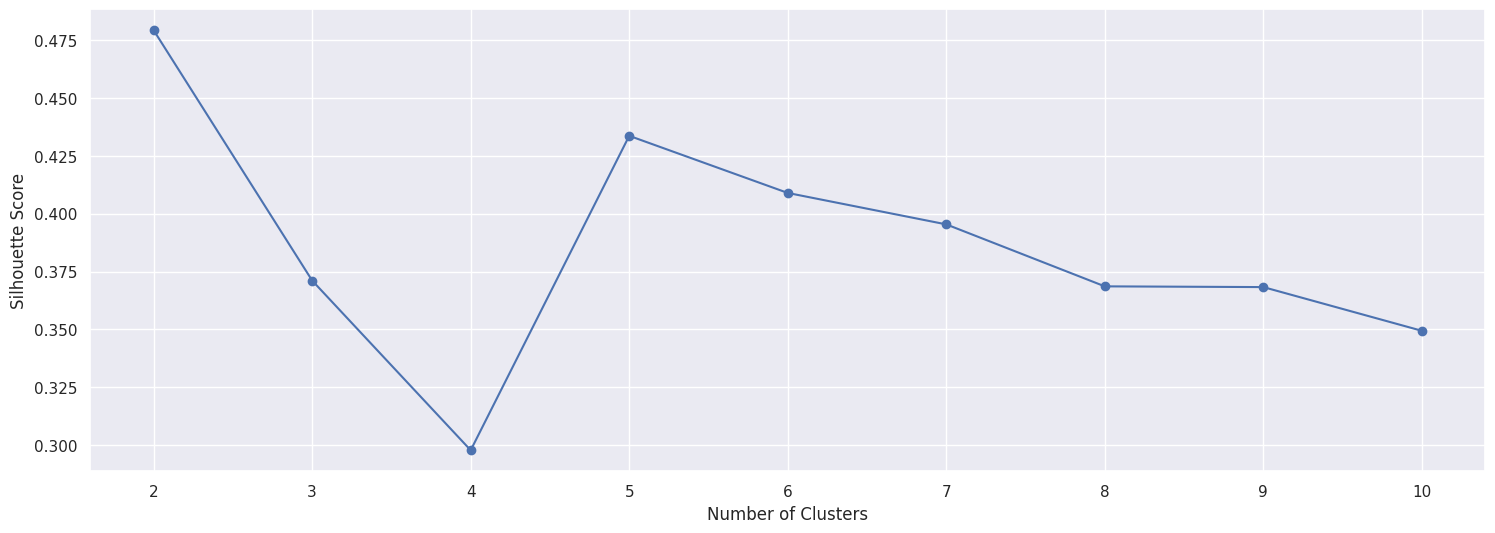

In [ ]:
plot_silhouette = plt.figure(figsize=(18, 6))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.show()